# $Dataset$ $explanation:$

- This dataset consists of traing and testing files,

- For each we have a Target column (LABEL) with binary value of eighter 1 (non-Exoplanet star) or 2 (Exoplanet star)

- Columns from Flux 1 till Flux 3197 are the flux value (Light intensighty emitted from the star) in 3200 time steps, Recorded every 30 Mins.

- ex: flux 1 and flux 2 reprsent the two values of light intensity in the beginning and ending of an hour of recording.

# **LAB 1 (EDA)**

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [3]:
# Set the path to the file you'd like to load we have "exoTrain.csv" and "exoTest.csv"
file_path = "exoTrain.csv"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "keplersmachines/kepler-labelled-time-series-data",
  file_path,

  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-3-2210258053.py:4: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [4]:
df.head(10)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


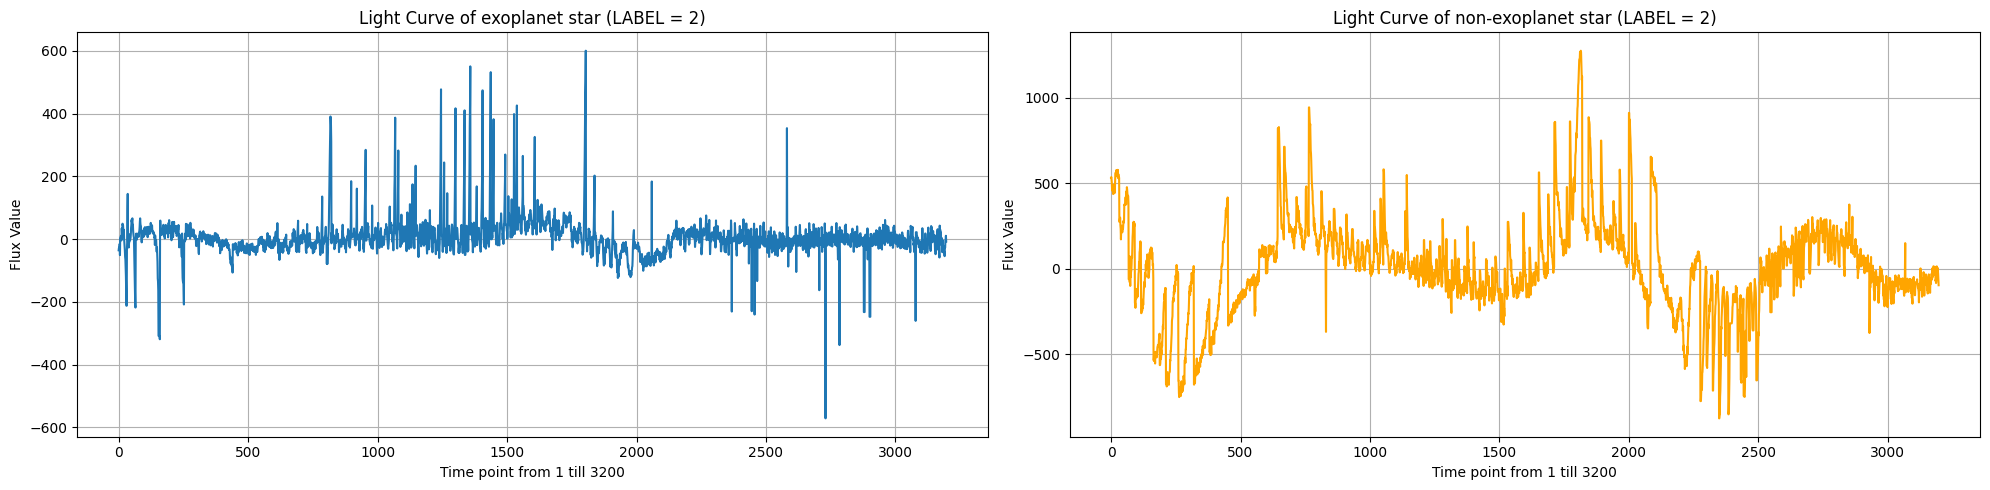

In [5]:

flux_only = df.drop(columns=["LABEL"])


Star_1 = df[df["LABEL"] == 1].drop(columns=["LABEL"]).iloc[1]
Star_2 = df[df["LABEL"] == 2].drop(columns=["LABEL"]).iloc[2]

plt.figure(figsize=(20, 5))


plt.subplot(1, 2, 1)
plt.plot(Star_1.values)
plt.title("Light Curve of exoplanet star (LABEL = 2)")
plt.xlabel("Time point from 1 till 3200")
plt.ylabel("Flux Value")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(Star_2.values, color='orange')
plt.title("Light Curve of non-exoplanet star (LABEL = 2)")
plt.xlabel("Time point from 1 till 3200")
plt.ylabel("Flux Value")
plt.grid(True)

plt.tight_layout()
plt.show()


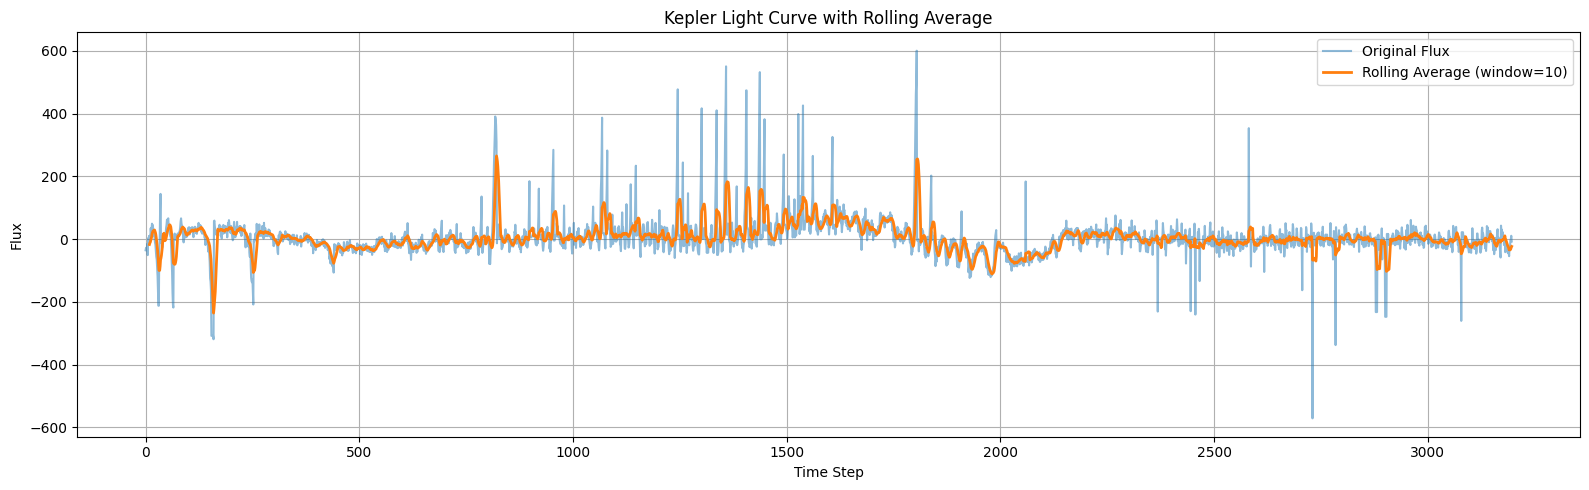

In [8]:
Star_1_series = pd.Series(Star_1.values)

# (rolling average)
rolling_flux = Star_1_series.rolling(window=10).mean()

plt.figure(figsize=(16, 5))
plt.plot(Star_1_series, label='Original Flux', alpha=0.5)
plt.plot(rolling_flux, label='Rolling Average (window=10)', linewidth=2)
plt.xlabel("Time Step")
plt.ylabel("Flux")
plt.title("Kepler Light Curve with Rolling Average")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

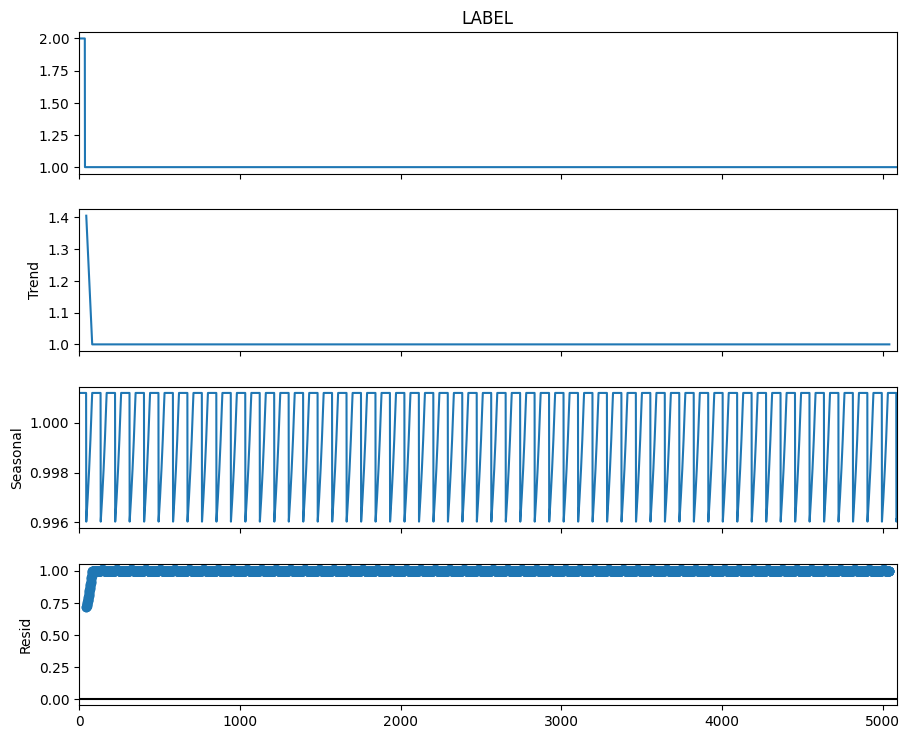

In [9]:
# Multiplicative model type, and daily (365) period
decomposition = seasonal_decompose(df['LABEL'],
                                   model = 'mul',
                                   period = 90)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

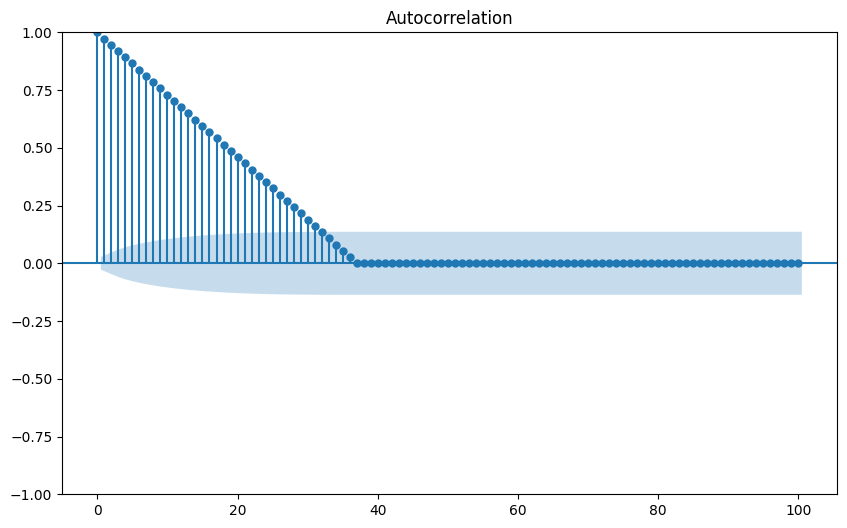

In [10]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['LABEL'], lags = 100, ax = ax)
plt.show()

# **LAB 2 (Holt Winters Prediction model)**

In [11]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#- In training and testing data each row represents a Star and each column represents the light emition from this star every 30 minutes (Kepler Satellite mission)

- So the demonstration of the SES model prediction will only be on 1 star (First row)

In [12]:
Star_1_series = pd.Series(Star_1.values)

# Split into 80% train and 20% test
split_index = int(len(Star_1) * 0.8)
train = Star_1_series[:split_index]
test = Star_1_series[split_index:]

In [13]:
SES_model = ExponentialSmoothing(train, trend=None, seasonal=None)
fit = SES_model.fit()

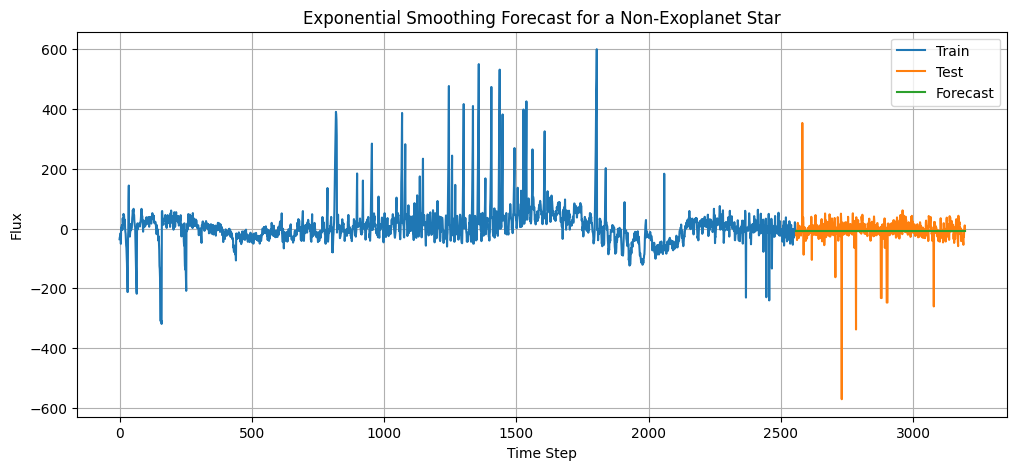

In [14]:
forecast = fit.forecast(len(test))

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title("Exponential Smoothing Forecast for a Non-Exoplanet Star")
plt.xlabel("Time Step")
plt.ylabel("Flux")
plt.grid(True)
plt.show()

In [15]:
Star_2_series = pd.Series(Star_2.values)

# Split into 70% train and 30% test
split_index = int(len(Star_1) * 0.7)
train2 = Star_2_series[:split_index]
test2 = Star_2_series[split_index:]

In [16]:
SES_model_2 = ExponentialSmoothing(train, trend=None, seasonal=None)
fit = SES_model_2.fit()

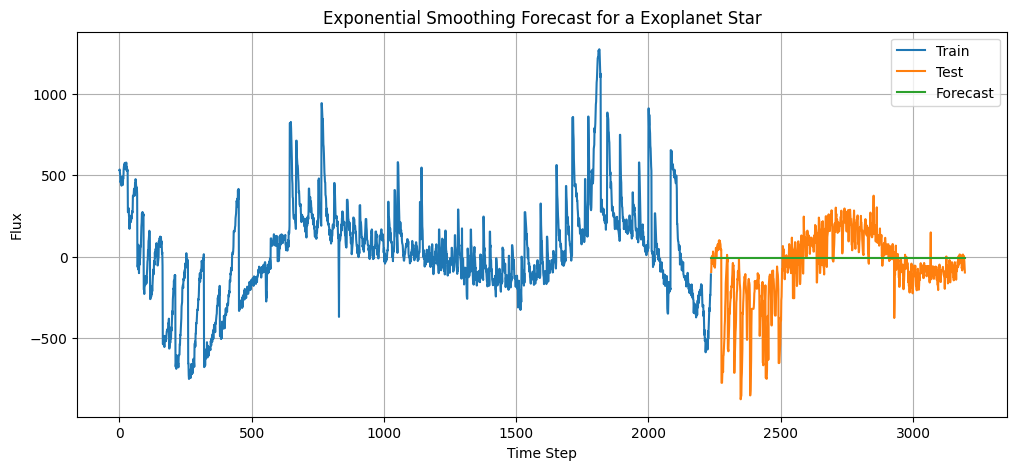

In [17]:
forecast = fit.forecast(len(test2))

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(train2.index, train2, label='Train')
plt.plot(test2.index, test2, label='Test')
plt.plot(test2.index, forecast, label='Forecast')
plt.legend()
plt.title("Exponential Smoothing Forecast for a Exoplanet Star")
plt.xlabel("Time Step")
plt.ylabel("Flux")
plt.grid(True)
plt.show()